In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataPate =pd.read_excel(open('analysistest.xlsx', 'rb'), sheet_name='MIA2') 
dataPate.columns =[column.replace(" ", "_") for column in dataPate.columns]
dataPate.head(1)

,Dataset,Training_Optimizer,target_epochs,learning_rate,Attack_Optimizer,Attack_learning_rate,attack_epochs,l2_norm_clip,batch_and_microbatch,noise_multiplier,learning_rate.1,F1Score,F1Score_DP
0,MNIST,DPGradientDescentGaussianOptimizer,10,0.15,adam,0.1,10,1,250,1.1,0.15,77.42,63.01


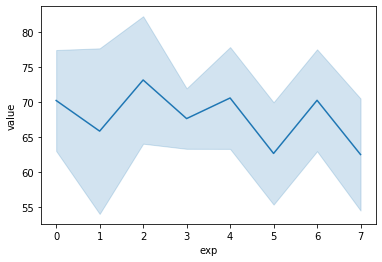

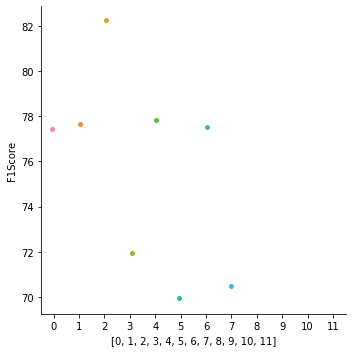

In [21]:

exps = list(range(0, 12))
data_preproc = pd.DataFrame({
    'exp': exps, 
    'A': dataPate.F1Score,
    'B': dataPate.F1Score_DP })
    
sns.lineplot(x='exp', y='value',
             data=pd.melt(data_preproc, ['exp'])) 

fig, axs = plt.subplots(ncols=2,nrows=1,figsize=(15, 6))
sns.lineplot("epsilon", "student_accuracy",  data=dataPate1,  hue="dataset", ax=axs[0][0],  palette=["C0", "C1","C2"]);
sns.lineplot( "epsilon","lap_noise",  data=dataPate,  ax=axs[0][1],  color="purple");

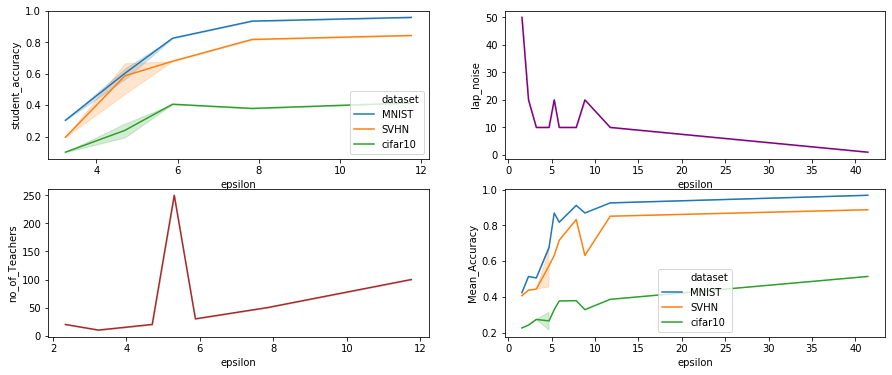

In [55]:
##epsilon plot
fig, axs = plt.subplots(ncols=2,nrows=2,figsize=(15, 6))
dataPate1= dataPate.query('lap_noise == 10')
dataPate2= dataPate.query('lap_noise == 10 or lap_noise == 20 and No_of_Queries ==100')
sns.lineplot("epsilon", "student_accuracy",  data=dataPate1,  hue="dataset", ax=axs[0][0],  palette=["C0", "C1","C2"]);
sns.lineplot( "epsilon","lap_noise",  data=dataPate,  ax=axs[0][1],  color="purple");
sns.lineplot( "epsilon","no_of_Teachers",  data=dataPate2,  ax=axs[1][0],   color="brown");
sns.lineplot( "epsilon","Mean_Accuracy",  data=dataPate,hue="dataset",  ax=axs[1][1],   palette=["C0", "C1","C2"]);

In [ ]:
#data1 = data[(data.mode == "Default") & (data.mode == "L2_norm_clip")]
#data1 = data.query('mode != "Default" and mode != "L2_norm_clip" and mode != "LearningRate"')
g = sns.FacetGrid(data=dataPate, col="lap_noise",hue="dataset",col_wrap=3, height=4)
g.map(sns.lineplot,"epsilon","student_accuracy")
g.add_legend()